$$ \left\{\begin{matrix}
y'(x) + 3cos^2(x) = y(x) \\
y(0) = 0
\end{matrix}\right. $$

 Символьное решение (SymPy)

In [1]:
import sympy as sp

x = sp.symbols('x')
y = sp.Function('y')

# Запишем уравнение y' + 3*cos^2(x) = y
ode = sp.Eq(y(x).diff(x) + 3*sp.cos(x)**2, y(x))

# Начальное условие y(0) = 0
ics = {y(0): 0}

# Решаем уравнение с начальными условиями
solution = sp.dsolve(ode, y(x), ics=ics)

print("Аналитическое решение:")
sp.pprint(solution)


Аналитическое решение:
            x                              
         9⋅ℯ    3⋅sin(2⋅x)   3⋅cos(2⋅x)   3
y(x) = - ──── - ────────── + ────────── + ─
          5         5            10       2


Численное решение (SciPy)

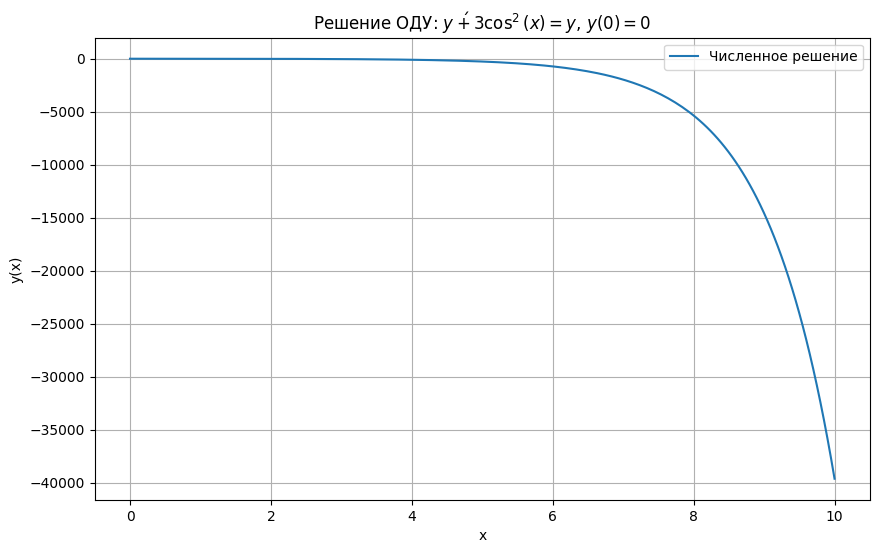

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Определяем функцию правой части уравнения y' = y - 3*cos^2(x)
def dydx(x, y):
    return y - 3 * np.cos(x)**2

# Интервал интегрирования
x_span = (0, 10)
x_eval = np.linspace(x_span[0], x_span[1], 200)

# Начальное условие y(0) = 0
y0 = [0]

# Численное решение методом Рунге-Кутты (RK45)
sol = solve_ivp(dydx, x_span, y0, t_eval=x_eval, method='RK45')

# Визуализация решения
plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[0], label='Численное решение')
plt.title(r'Решение ОДУ: $y\' + 3\cos^2(x) = y$, $y(0)=0$')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.legend()
plt.show()
